# Equipo 9:
## Integrantes:
- CRUZ MIER SAMUEL
- JIMENEZ QUIROZ ENYA EZTLI 
- REYES SANCHEZ LAURA PAMELA 
- MARTíNEZ FLORES PATRICIO SEBASTIÁN
- MOSQUERA ALVAREZ JUAN DAVID
- OSORIO MONTENEGRO JUAN DIEGO

In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import gower
from sklearn.metrics import silhouette_score
import prince
import seaborn as sns

In [2]:
df = pd.read_csv('EDG_1990_2021_pros.csv', sep=',')

# 1) Pre-procesamiento de datos

eliminación de registros duplicados

In [3]:
df

,anio_insc,mes_insc,sexo,anio_nac,mes_nac,anio_fall,mes_fall,cod_edad,edad,est_civil,sabe_leer,prov_fall,niv_inst,cer_por,anio_base,total,ID_Causa,Causa
0,2011.0,Febrero,Hombre,1983.0,Diciembre,2011.0,Febrero,Años,27,Soltero(a),No,Imbabura,Ninguno,Médico (a) Tratante,2011.0,1.0,11,Neoplasia maligna del hígado y de las vías bil...
1,2008.0,Julio,Hombre,1934.0,Enero,2008.0,Julio,Años,74,Soltero(a),Sin información,Loja,Sin información,Médico (a) Tratante,2008.0,1.0,35,Enfermedades isquémicas del corazón
2,2010.0,Marzo,Mujer,1931.0,Diciembre,2010.0,Marzo,Años,78,Casado(a),No,Loja,Ninguno,Médico (a) Tratante,2010.0,1.0,42,Enfermedades cerebrovasculares
3,1998.0,Abril,Hombre,1991.0,Abril,1998.0,Marzo,Años,6,Sin información,Si,Cañar,Primaria,Médico (a) no Tratante,1998.0,1.0,57,Accidentes de transporte terrestre
4,2012.0,Agosto,Mujer,1956.0,Octubre,2012.0,Agosto,Años,55,Casado(a),Si,Manabí,Superior,Médico (a) Tratante,2012.0,1.0,17,Neoplasia maligna de la mama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,2015.0,Junio,Mujer,1947.0,Diciembre,2015.0,Junio,Años,67,Soltero(a),Si,Manabí,Primaria,Médico (a) no Tratante,2015.0,1.0,51,Cirrosis y otras enfermedades del hígado
256959,2016.0,Noviembre,Mujer,1948.0,Mayo,2016.0,Noviembre,Años,68,Casado(a),Si,Los Ríos,Primaria,Médico (a) Tratante,2016.0,1.0,26,Diabetes Mellitus
256960,2016.0,Febrero,Mujer,1954.0,Mayo,2016.0,Febrero,Años,61,Soltero(a),No,Santo Domingo de los Tsachilas,Ninguno,Médico (a) no Tratante,2016.0,1.0,26,Diabetes Mellitus
256961,2019.0,Febrero,Hombre,1970.0,Mayo,2019.0,Febrero,Años,48,Casado(a),Si,Pichincha,Primaria,Médico (a) Legista,2019.0,1.0,63,Lesiones autoinflingidas intencionalmente (Sui...


In [4]:
df1 = df[df.duplicated(keep=False)]

In [5]:
df1

,anio_insc,mes_insc,sexo,anio_nac,mes_nac,anio_fall,mes_fall,cod_edad,edad,est_civil,sabe_leer,prov_fall,niv_inst,cer_por,anio_base,total,ID_Causa,Causa
124,1997.0,Junio,Mujer,1997.0,Mayo,1997.0,Junio,Días,16,Sin información,Sin información,Guayas,Sin información,Médico (a) no Tratante,1997.0,1.0,55,Ciertas afecciones originadas en el período pr...
189,2020.0,Abril,Hombre,1978.0,Marzo,2020.0,Marzo,Años,42,Casado(a),Si,Guayas,Secundaria,Médico (a) no Tratante,2020.0,1.0,35,Enfermedades isquémicas del corazón
323,1999.0,Septiembre,Mujer,1999.0,Septiembre,1999.0,Septiembre,Horas,1,Sin información,Sin información,Guayas,Sin información,Médico (a) no Tratante,1999.0,1.0,55,Ciertas afecciones originadas en el período pr...
443,2005.0,Mayo,Hombre,2005.0,Mayo,2005.0,Mayo,Días,3,Sin información,Sin información,Guayas,Sin información,Médico (a) no Tratante,2005.0,1.0,55,Ciertas afecciones originadas en el período pr...
478,1998.0,Septiembre,Hombre,1998.0,Septiembre,1998.0,Septiembre,Horas,1,Sin información,Sin información,Pichincha,Sin información,Médico (a) Tratante,1998.0,1.0,55,Ciertas afecciones originadas en el período pr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256227,2007.0,Diciembre,Hombre,1978.0,Octubre,2007.0,Diciembre,Años,29,Soltero(a),Si,Guayas,Secundaria,Médico (a) Tratante,2007.0,1.0,7,Enfermedad por virus de la inmunodeficiencia (...
256293,1999.0,Abril,Mujer,1999.0,Enero,1999.0,Abril,Meses,3,Sin información,Sin información,Guayas,Sin información,Médico (a) no Tratante,1999.0,1.0,27,Desnutrición y anemias nutricionales
256406,2020.0,Abril,Hombre,2020.0,Marzo,2020.0,Abril,Meses,1,Soltero(a),No,Guayas,Sin información,Médico (a) Tratante,2020.0,1.0,55,Ciertas afecciones originadas en el período pr...
256407,2002.0,Mayo,Mujer,2002.0,Mayo,2002.0,Mayo,Horas,17,Sin información,Sin información,Guayas,Ninguno,Médico (a) no Tratante,2002.0,1.0,55,Ciertas afecciones originadas en el período pr...


In [6]:
elim_ind=df1.index
elim_ind

Index([   124,    189,    323,    443,    478,    595,    648,    665,    934,
         1066,
       ...
       255621, 255712, 255777, 255885, 256172, 256227, 256293, 256406, 256407,
       256927],
      dtype='int64', length=1751)

In [7]:
#eliminación de lista de indices duplicados
df= df.drop(df.index[elim_ind])

In [8]:
#eliminación de columna de anio_base debido a ser una columna repetida
df.drop(['anio_base'],axis = 'columns', inplace=True)

# 2) Selección de Características o Variables

In [9]:
#eliminación de columna total debido a no haber iformación de dicha columna en la info del dataset
df.drop(['total'],axis = 'columns', inplace=True)

In [10]:
df

,anio_insc,mes_insc,sexo,anio_nac,mes_nac,anio_fall,mes_fall,cod_edad,edad,est_civil,sabe_leer,prov_fall,niv_inst,cer_por,ID_Causa,Causa
0,2011.0,Febrero,Hombre,1983.0,Diciembre,2011.0,Febrero,Años,27,Soltero(a),No,Imbabura,Ninguno,Médico (a) Tratante,11,Neoplasia maligna del hígado y de las vías bil...
1,2008.0,Julio,Hombre,1934.0,Enero,2008.0,Julio,Años,74,Soltero(a),Sin información,Loja,Sin información,Médico (a) Tratante,35,Enfermedades isquémicas del corazón
2,2010.0,Marzo,Mujer,1931.0,Diciembre,2010.0,Marzo,Años,78,Casado(a),No,Loja,Ninguno,Médico (a) Tratante,42,Enfermedades cerebrovasculares
3,1998.0,Abril,Hombre,1991.0,Abril,1998.0,Marzo,Años,6,Sin información,Si,Cañar,Primaria,Médico (a) no Tratante,57,Accidentes de transporte terrestre
4,2012.0,Agosto,Mujer,1956.0,Octubre,2012.0,Agosto,Años,55,Casado(a),Si,Manabí,Superior,Médico (a) Tratante,17,Neoplasia maligna de la mama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,2015.0,Junio,Mujer,1947.0,Diciembre,2015.0,Junio,Años,67,Soltero(a),Si,Manabí,Primaria,Médico (a) no Tratante,51,Cirrosis y otras enfermedades del hígado
256959,2016.0,Noviembre,Mujer,1948.0,Mayo,2016.0,Noviembre,Años,68,Casado(a),Si,Los Ríos,Primaria,Médico (a) Tratante,26,Diabetes Mellitus
256960,2016.0,Febrero,Mujer,1954.0,Mayo,2016.0,Febrero,Años,61,Soltero(a),No,Santo Domingo de los Tsachilas,Ninguno,Médico (a) no Tratante,26,Diabetes Mellitus
256961,2019.0,Febrero,Hombre,1970.0,Mayo,2019.0,Febrero,Años,48,Casado(a),Si,Pichincha,Primaria,Médico (a) Legista,63,Lesiones autoinflingidas intencionalmente (Sui...


## revisión de valores presentes en columnas

In [11]:
valores_unicos = df['mes_insc'].unique()
valores_unicos
#valores de 88 y 99 no válidos

array(['Febrero', 'Julio', 'Marzo', 'Abril', 'Agosto', 'Junio', 'Mayo',
       'Octubre', 'Diciembre', 'Noviembre', 'Enero', 'Septiembre', '88.0',
       '99.0'], dtype=object)

In [12]:
valores_unicos = df['mes_nac'].unique()
valores_unicos
#valor de 99 no válido

array(['Diciembre', 'Enero', 'Abril', 'Octubre', 'Noviembre', 'Mayo',
       'Septiembre', 'Junio', 'Marzo', 'Agosto', 'Julio', 'Febrero',
       '99.0'], dtype=object)

In [13]:
valores_unicos = df['anio_nac'].unique()
valores_unicos
#valor de 1219 no válido

array([1983., 1934., 1931., 1991., 1956., 1946., 1976., 2003., 1997.,
       1963., 2019., 1958., 2012., 1996., 1955., 1930., 1940., 1945.,
       1949., 1970., 1936., 1942., 1950., 1925., 2009., 1990., 1980.,
       2018., 1971., 1939., 1978., 1953., 1948., 1928., 1927., 1935.,
       1941., 2002., 1952., 1994., 2006., 1986., 1960., 1989., 1938.,
       1975., 1954., 1961., 1944., 1962., 1922., 1998., 2020., 2010.,
       1979., 1999., 1937., 1992., 2013., 1964., 1972., 1957., 2017.,
       1943., 2001., 1926., 1947., 1951., 2004., 1966., 1984., 1959.,
       1919., 2008., 1923., 2000., 1929., 1967., 1969., 1932., 1933.,
       1987., 1968., 1985., 1973., 1993., 1965., 1920., 1982., 2005.,
       1921., 1924., 1981., 2014., 2016., 2015., 1988., 2011., 2007.,
       1977., 2021., 1974., 1995., 1917., 1918., 9999., 1219.])

In [14]:
valores_unicos = df['prov_fall'].unique()
valores_unicos
#valor de exterior no válido

array(['Imbabura', 'Loja', 'Cañar', 'Manabí', 'Bolívar', 'Guayas',
       'Tungurahua', 'Pichincha', 'Azuay', 'Orellana', 'Los Ríos',
       'Esmeraldas', 'Zamora Chinchipe', 'El Oro', 'Pastaza', 'Sucumbíos',
       'Chimborazo', 'Cotopaxi', 'Carchi', 'Napo', 'Santa Elena',
       'Santo Domingo de los Tsachilas', 'Morona Santiago', 'Exterior',
       'Galápagos'], dtype=object)

In [15]:
valores_unicos = df['niv_inst'].unique()
valores_unicos
#valor de sin información no válido

array(['Ninguno', 'Sin información', 'Primaria', 'Superior', 'Secundaria',
       'Educación media /  Bachillerato', 'Educación Básica',
       'Ciclo posbachillerato', 'Centro de Alfabetización', 'Posgrado'],
      dtype=object)

## eliminación de filas con valores no 'válidos' en fechas de meses

In [16]:
#obtención y eliminación de indices columna 'mes_insc'
indices= [i for i, j  in enumerate(df['mes_insc']) if j == '88.0' or j=='99.0']
df= df.drop(df.index[indices])

In [17]:
#obtención y eliminación de indices columna 'mes_nac'
indices= [i for i, j  in enumerate(df['mes_nac']) if j=='99.0']
df= df.drop(df.index[indices])

In [18]:
#obtención y eliminación de indices columna 'anio_nac'
indices= [i for i, j  in enumerate(df['anio_nac']) if j==1219]
df= df.drop(df.index[indices])

In [19]:
#obtención y eliminación de indices columna 'prov_fall'
indices= [i for i, j  in enumerate(df['prov_fall']) if j=="Exterior"]
df= df.drop(df.index[indices])

In [20]:
#obtención y eliminación de indices columna 'niv_inst'
indices= [i for i, j  in enumerate(df['niv_inst']) if j=="Sin información"]
df= df.drop(df.index[indices])

In [21]:
df

,anio_insc,mes_insc,sexo,anio_nac,mes_nac,anio_fall,mes_fall,cod_edad,edad,est_civil,sabe_leer,prov_fall,niv_inst,cer_por,ID_Causa,Causa
0,2011.0,Febrero,Hombre,1983.0,Diciembre,2011.0,Febrero,Años,27,Soltero(a),No,Imbabura,Ninguno,Médico (a) Tratante,11,Neoplasia maligna del hígado y de las vías bil...
2,2010.0,Marzo,Mujer,1931.0,Diciembre,2010.0,Marzo,Años,78,Casado(a),No,Loja,Ninguno,Médico (a) Tratante,42,Enfermedades cerebrovasculares
3,1998.0,Abril,Hombre,1991.0,Abril,1998.0,Marzo,Años,6,Sin información,Si,Cañar,Primaria,Médico (a) no Tratante,57,Accidentes de transporte terrestre
4,2012.0,Agosto,Mujer,1956.0,Octubre,2012.0,Agosto,Años,55,Casado(a),Si,Manabí,Superior,Médico (a) Tratante,17,Neoplasia maligna de la mama
5,2010.0,Abril,Mujer,1946.0,Noviembre,2010.0,Abril,Años,63,Unido(a),Si,Bolívar,Primaria,Médico (a) no Tratante,51,Cirrosis y otras enfermedades del hígado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,2015.0,Junio,Mujer,1947.0,Diciembre,2015.0,Junio,Años,67,Soltero(a),Si,Manabí,Primaria,Médico (a) no Tratante,51,Cirrosis y otras enfermedades del hígado
256959,2016.0,Noviembre,Mujer,1948.0,Mayo,2016.0,Noviembre,Años,68,Casado(a),Si,Los Ríos,Primaria,Médico (a) Tratante,26,Diabetes Mellitus
256960,2016.0,Febrero,Mujer,1954.0,Mayo,2016.0,Febrero,Años,61,Soltero(a),No,Santo Domingo de los Tsachilas,Ninguno,Médico (a) no Tratante,26,Diabetes Mellitus
256961,2019.0,Febrero,Hombre,1970.0,Mayo,2019.0,Febrero,Años,48,Casado(a),Si,Pichincha,Primaria,Médico (a) Legista,63,Lesiones autoinflingidas intencionalmente (Sui...


para las edades, aquellos con días o meses de nacidos, se cambiará a cero años, y se elimina columna de código de edad

In [22]:
#sustitución de edades, si murio antes de un año, se sustituye la edad a cero años
df.loc[df.cod_edad != 'Años', "edad"] = 0

In [23]:
#eliminación de columna de códigos de edades
df.drop(['cod_edad'],axis = 'columns', inplace=True)

In [24]:
#eliminación de columna de anio_base debido a ser una columna repetida
df.drop(['Causa'],axis = 'columns', inplace=True)
#eliminación de columnas consideradas no relevantes para la muerte
df.drop(['anio_insc'],axis = 'columns', inplace=True)
df.drop(['sabe_leer'],axis = 'columns', inplace=True)
df.drop(['cer_por'],axis = 'columns', inplace=True)
df.drop(['mes_insc'],axis = 'columns', inplace=True)
df.drop(['est_civil'],axis = 'columns', inplace=True)
#eliminación de columna anio,mes_nac al poder ser deducida de otros parámetros
df.drop(['anio_nac'],axis = 'columns', inplace=True)
df.drop(['mes_nac'],axis = 'columns', inplace=True)

In [44]:
df

,sexo,anio_fall,mes_fall,edad,prov_fall,niv_inst,ID_Causa
0,Hombre,2011.0,Febrero,27,Imbabura,Ninguno,11
2,Mujer,2010.0,Marzo,78,Loja,Ninguno,42
3,Hombre,1998.0,Marzo,6,Cañar,Primaria,57
4,Mujer,2012.0,Agosto,55,Manabí,Superior,17
5,Mujer,2010.0,Abril,63,Bolívar,Primaria,51
...,...,...,...,...,...,...,...
256958,Mujer,2015.0,Junio,67,Manabí,Primaria,51
256959,Mujer,2016.0,Noviembre,68,Los Ríos,Primaria,26
256960,Mujer,2016.0,Febrero,61,Santo Domingo de los Tsachilas,Ninguno,26
256961,Hombre,2019.0,Febrero,48,Pichincha,Primaria,63


# 3) Optimización de Hiper-parámetros
se parte de usar dos clusters al haber sido aquel con el mayor valor entregado a partir del método del codo

## Prueba 1

In [45]:
#random state a partir del número de equipo
km_2 = KModes(n_clusters=2,init='Cao',n_init=5,verbose=1,random_state=29) 

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [46]:
clusters_2 = km_2.fit_predict(df)
clusters_2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2838, cost: 1097590.0


array([0, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [47]:
# Insertemos las etiquetas en nuestro dataset original.
df_labels2 = df.copy()
df_labels2.insert(0,"cluster_labels", clusters_2)

In [48]:
# Calculo de Average Silhouette Score
# Convertir todas las columnas categóricas a strings
df_str = df_labels2.applymap(str)

#Sacamos una muestra, en caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=1000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 2: 0.081248


## Prueba 2

In [49]:
#random state a partir del número de equipo
km_2 = KModes(n_clusters=2,init='Huang',n_init=15,verbose=1,random_state=9) 

In [50]:
clusters_2 = km_2.fit_predict(df)
clusters_2

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29141, cost: 1095677.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 29928, cost: 1096324.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3096, cost: 1153031.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 29896, cost: 1127571.0
Run 4, iteration: 2/100, moves: 6612, cost: 1127571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 20097, cost: 1094354.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 30633, cost: 1118922.0
Run 6, iteration: 2/100, moves: 3405, cost: 1118922.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run

array([0, 1, 0, ..., 1, 0, 0], dtype=uint16)

In [51]:
# Insertemos las etiquetas en nuestro dataset original.
df_labels2 = df.copy()
df_labels2.insert(0,"cluster_labels", clusters_2)

In [52]:
# Calculo de Average Silhouette Score
# Convertir todas las columnas categóricas a strings
df_str = df_labels2.applymap(str)

#Sacamos una muestra, en caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=1000, random_state=6)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 2: 0.11721134


## Prueba 3

In [53]:
#random state a partir del número de equipo
km_3 = KModes(n_clusters=2,init='Huang',n_init=5,verbose=1,random_state=12) 

In [54]:
clusters_3 = km_3.fit_predict(df)
clusters_3

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19846, cost: 1095847.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 23667, cost: 1145783.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 30757, cost: 1120578.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15028, cost: 1098989.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 12711, cost: 1121708.0
Best run was number 1


array([1, 0, 1, ..., 0, 1, 1], dtype=uint16)

In [55]:
# Insertemos las etiquetas en nuestro dataset original.
df_labels3 = df.copy()
df_labels3.insert(0,"cluster_labels", clusters_3)

In [56]:
# Calculo de Average Silhouette Score
# Convertir todas las columnas categóricas a strings
df_str = df_labels3.applymap(str)

#Sacamos una muestra, en caso contrario la memoria RAM no será suficiente
df_str = df_str.sample(n=1000, random_state=1)

# Luego calcular la matriz de distancias de Gower como antes
gower_distances = gower.gower_matrix(df_str.drop('cluster_labels', axis=1))

# Calcular el Silhouette Score
silhouette_avg_gower = silhouette_score(gower_distances, df_str['cluster_labels'], metric='precomputed')
print("Average Categorical Silhouette Score con K = 2:", silhouette_avg_gower)

Average Categorical Silhouette Score con K = 2: 0.105871126


Prueba 2 fue la de mejor resultado

# 4. Visualización de los clusters

In [57]:
# Aplicamos MCA para reducir la dimensionalidad del dataset original
# Veamos las variables que tenemos:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219316 entries, 0 to 256962
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   sexo       219316 non-null  object 
 1   anio_fall  219316 non-null  float64
 2   mes_fall   219316 non-null  object 
 3   edad       219316 non-null  int64  
 4   prov_fall  219316 non-null  object 
 5   niv_inst   219316 non-null  object 
 6   ID_Causa   219316 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.4+ MB


In [58]:
# Transformamos las variables no categóricas a variables tipo dummy
df_categorical = pd.get_dummies(df)
df_categorical

,anio_fall,edad,ID_Causa,sexo_Hombre,sexo_Mujer,mes_fall_Abril,mes_fall_Agosto,mes_fall_Diciembre,mes_fall_Enero,mes_fall_Febrero,...,prov_fall_Zamora Chinchipe,niv_inst_Centro de Alfabetización,niv_inst_Ciclo posbachillerato,niv_inst_Educación Básica,niv_inst_Educación media / Bachillerato,niv_inst_Ninguno,niv_inst_Posgrado,niv_inst_Primaria,niv_inst_Secundaria,niv_inst_Superior
0,2011.0,27,11,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,2010.0,78,42,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1998.0,6,57,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2012.0,55,17,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,2010.0,63,51,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256958,2015.0,67,51,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
256959,2016.0,68,26,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
256960,2016.0,61,26,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
256961,2019.0,48,63,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [59]:
# Indicamos el número de componentes que requerimos, que en este caso es dos.
mca = prince.MCA(n_components=2)
# Ajustamos MCA a nuestros datos
mca = mca.fit(df_categorical)
mca

# Transforme el conjunto de datos (esto le dará las coordenadas de cada muestra en los nuevos ejes)
mca_coordinates = mca.transform(df_categorical)
mca_coordinates

,0,1
0,0.097462,0.222277
2,0.307212,-0.170527
3,-0.129962,0.220210
4,0.054270,-0.395046
5,0.064968,-0.229860
...,...,...
256958,-0.028859,-0.265705
256959,0.019343,-0.304035
256960,0.214485,-0.221627
256961,-0.208480,0.126780


In [60]:
# Agregamos una columna con la etiqueta de los clusters. K = 2
mca_coordinates['cluster_labels'] = df_labels2['cluster_labels']
mca_coordinates.head()

,0,1,cluster_labels
0,0.097462,0.222277,0
2,0.307212,-0.170527,1
3,-0.129962,0.220210,0
4,0.054270,-0.395046,0
5,0.064968,-0.229860,1


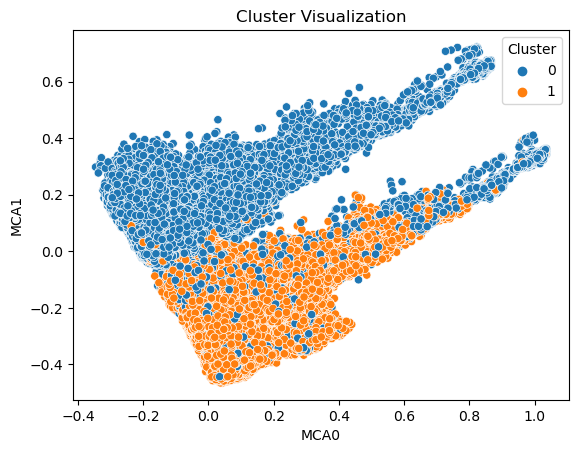

In [61]:
# Dibujamos los clusters
# Dibuja el diagrama de dispersión coloreando los puntos por grupo.
sns.scatterplot(data=mca_coordinates, x=mca_coordinates.iloc[:, 0], y=mca_coordinates.iloc[:, 1], hue='cluster_labels')
# Agregar una leyenda
plt.legend(title='Cluster')
# Optional: Add title and axis labels
plt.title('Cluster Visualization')
plt.xlabel('MCA0')
plt.ylabel('MCA1')
# Show the plot
plt.show()